In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ratings= pd.read_csv('BX-Book-Ratings.csv')
df_books=pd.read_csv('BX-Books.csv')
df_users=pd.read_csv('BX-Users.csv')

In [3]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [7]:
df_users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [9]:
df_books.isna().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [10]:
df_books.describe()

,isbn,book_title,book_author,year_of_publication,publisher
count,271379,271379,271378,271379,271377
unique,271379,242150,102042,202,16823
top,385029306,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,17145,7535


In [11]:
df_users.isna().sum()

user_id          0
Location         1
Age         110763
dtype: int64

In [12]:
df_books.year_of_publication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [13]:
df_books.publisher.unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [14]:
df_books = df_books[~df_books['year_of_publication'].isin(['DK Publishing Inc', 'Gallimard','Isadora Duncan','Bart Rulon','Alan Rich',
                                                           'John Peterman','\\"Freedom Song\\""','K.C. Constantine','Karen T. Whittenburg',
                                                           'Luella Hill','Frank Muir','ROBERT A. WILSON','John Alderson Foote','Jules Janin',
                                                           'Stan Berenstain','George H. Scherr','Salvador de Madariaga','Francine Pascal',' &amp',' Learning"'
                                                          ,'Beatrix Potter'])]
df_books['year_of_publication'] = pd.to_numeric(df_books['year_of_publication'])

In [15]:
df_books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication     int64
publisher              object
dtype: object

In [16]:
print( sorted(df_users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [17]:
df_users.loc[(df_users.Age<5)|(df_users.Age>90)]=np.nan
df_users.Age=df_users.Age.fillna(df_users.Age.mean())
df_users.Age=df_users.Age.astype(np.int32)

In [18]:
df_users.isna().sum(), df_users.shape

(user_id     1312
 Location    1313
 Age            0
 dtype: int64,
 (278859, 3))

In [19]:
df_users.dropna(inplace=True)

In [20]:
df_users.dtypes

user_id     object
Location    object
Age          int32
dtype: object

In [21]:
df_ratings.isna().sum(), df_ratings.shape

(user_id    0
 isbn       0
 rating     0
 dtype: int64,
 (1048575, 3))

In [22]:
df_books.isna().sum(), df_books.shape

(isbn                   0
 book_title             0
 book_author            1
 year_of_publication    0
 publisher              2
 dtype: int64,
 (271357, 5))

In [23]:
df_books.dropna(inplace=True)

In [24]:
new_ratings=df_ratings[df_ratings.isbn.isin(df_books.isbn)]
new_ratings=new_ratings[new_ratings.user_id.isin(df_users.user_id)]

In [25]:
new_ratings.head()

,user_id,isbn,rating
9561,2,195153448,0
9563,8,2005018,5
9564,8,60973129,0
9565,8,374157065,0
9566,8,393045218,0


In [26]:
print(df_ratings.shape)
print(new_ratings.shape)

(1048575, 3)
(928038, 3)


In [27]:
sorted(df_ratings.rating.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
df_ratings.rating.value_counts()

0     651330
8      95037
10     71814
7      70018
9      62101
5      46953
6      33753
4       8031
3       5445
2       2492
1       1601
Name: rating, dtype: int64

In [29]:
rating_imp=new_ratings[new_ratings.rating==0]
rating_exp=new_ratings[new_ratings.rating!=0]

In [30]:
rating_imp.describe()

,user_id,rating
count,579841.000000,579841.0
mean,129767.348859,0.0
std,73133.983841,0.0
min,2.000000,0.0
25%,64679.000000,0.0
50%,130474.000000,0.0
75%,195694.000000,0.0
max,250764.000000,0.0


In [31]:
rating_exp.describe()

,user_id,rating
count,348197.000000,348197.000000
mean,123378.845277,7.628934
std,72988.046692,1.838700
min,8.000000,1.000000
25%,60244.000000,7.000000
50%,120892.000000,8.000000
75%,185722.000000,9.000000
max,250764.000000,10.000000


In [32]:
users_imp_rating=df_users[df_users.user_id.isin(rating_imp.user_id)]
users_exp_rating=df_users[df_users.user_id.isin(rating_exp.user_id)]

<AxesSubplot:xlabel='rating', ylabel='count'>

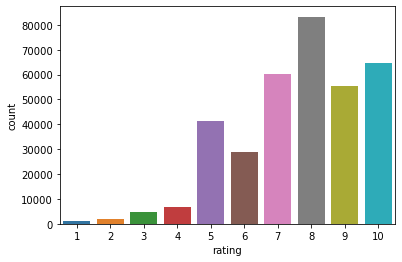

In [33]:
sns.countplot(data=rating_exp,x='rating')

In [34]:
rating_count=pd.DataFrame(rating_exp.groupby(['isbn'])['rating'].sum())
top10=rating_count.sort_values('rating',ascending=False).head(10)
print('Following are Top 10 books:')
top10.merge(df_books,left_index=True,right_on='isbn')

Following are Top 10 books:


,rating,isbn,book_title,book_author,year_of_publication,publisher
408,5128,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,3779,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,2859,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2499,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2362,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2324,971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2282,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2112,446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
231,1986,452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,1979,671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


In [35]:
n_books=df_books.shape[0]
n_users=df_users.shape[0]

In [36]:
sparsity=1.0-len(new_ratings)/float(n_books*n_users)
print(sparsity*100)

99.99876776210941


In [37]:
new_book_df= pd.merge(df_books, rating_exp, on='isbn')

In [38]:
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating
0,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [39]:
print(new_book_df.shape)

(348197, 7)


# Filtering method

In [40]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_book_df, test_size=0.20)

In [41]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 278557
Testing set lengths: 69640
Test set is 20% of the full dataset.


In [42]:
train_data

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating
50862,1853811262,Cats Eye,Margaret Atwood,1995,Trafalgar Square,222292,5
208144,871564521,A Thousand Leagues of Blue: The Sierra Club Bo...,John A. Murray,1994,Univ of California Pr,29528,5
31215,440224764,The Partner,John Grisham,1998,Dell Publishing Company,128208,9
68257,440180295,Slaughterhouse Five or the Children's Crusade:...,Kurt Vonnegut,1991,Laurel,249359,6
5287,385511612,Bleachers,John Grisham,2003,Doubleday,18836,10
...,...,...,...,...,...,...,...
185695,753806738,"Through a Glass, Darkly",Jostein Gaarder,1999,Orion Publishing Group,205999,10
148069,684834308,MICHAEL AND NATASHA,Donald Crawford,1997,Scribner,187397,9
157737,811811409,The Venetian's Wife: A Strangely Sensual Tale ...,Nick Bantock,1996,Chronicle Books,11676,10
337154,916856461,A a En Prisiones,Alcoholics Anonymous,0,Alcoholics Anonymous World,120548,8


In [43]:
u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [44]:
train_data_user2idx

{222292: 0,
 29528: 1,
 128208: 2,
 249359: 3,
 18836: 4,
 82971: 5,
 153054: 6,
 16718: 7,
 206300: 8,
 239551: 9,
 208809: 10,
 60244: 11,
 98051: 12,
 159405: 13,
 242409: 14,
 144114: 15,
 43842: 16,
 206074: 17,
 43910: 18,
 71900: 19,
 203799: 20,
 27265: 21,
 117384: 22,
 222918: 23,
 80908: 24,
 88693: 25,
 135149: 26,
 168047: 27,
 148898: 28,
 21576: 29,
 73394: 30,
 171118: 31,
 212088: 32,
 189973: 33,
 12641: 34,
 17190: 35,
 100264: 36,
 6577: 37,
 212328: 38,
 122372: 39,
 217318: 40,
 23902: 41,
 197659: 42,
 26914: 43,
 9908: 44,
 210738: 45,
 105221: 46,
 165549: 47,
 47215: 48,
 132465: 49,
 56399: 50,
 250371: 51,
 239705: 52,
 3757: 53,
 154882: 54,
 184532: 55,
 223697: 56,
 52350: 57,
 313: 58,
 241036: 59,
 93047: 60,
 69466: 61,
 98391: 62,
 191523: 63,
 223624: 64,
 12572: 65,
 60337: 66,
 67840: 67,
 246512: 68,
 78553: 69,
 83287: 70,
 76626: 71,
 100906: 72,
 217121: 73,
 102220: 74,
 146421: 75,
 185361: 76,
 202381: 77,
 77768: 78,
 80538: 79,
 38994: 80,

In [45]:

# TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'rating']]
test_data = test_data[['u_unique', 'i_unique', 'rating']]

In [46]:
train_data.sample(5)

,u_unique,i_unique,rating
278317,62,4732,9
338043,6031,25404,7
34908,2620,20437,10
163207,52331,117267,8
32888,18274,3686,6


In [47]:
n_user = train_data['u_unique'].nunique()
n_book = train_data['i_unique'].nunique()
train_matrix = np.zeros((n_user,n_book),dtype='uint8')

In [48]:
for entry in train_data.itertuples():                 
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]  

In [49]:
train_matrix.shape

(53740, 121018)

In [50]:
nk_users = test_data['u_unique'].nunique()
nk_books = test_data['i_unique'].nunique()
test_matrix = np.zeros((nk_users, nk_books),dtype='uint8')

In [51]:
for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [52]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [53]:
def predict_books(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)   
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [54]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.930886568530893
User-based CF RMSE: 7.930152626128457
